In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter

In [2]:
df = pd.read_csv(r'C:\Users\scott\DAEN_690\BLS_Extract_2016_2020.txt', 
                 sep = '|',encoding='unicode_escape', dtype='unicode',
                 index_col=False)

In [3]:
df1 = df.loc[(df['area_type'] == '5') | (df['area_type'] == '6')]

In [4]:
ITjobcodes2 = [151141,151141,151141,113021,151111,151121,151131,151142,151143,151151,151152,113021,151111,151121,151131,
               151142,151143,151151,151152,113021,151111,151121,151131,151142,151143,151151,151152,151134,151134,151134,
               151132,151133,151132,151133,151132,151133,151122,151122,151122,113021,150000,151211,151212,151221,151231,
               151241,151245,151251,151256,151257,151299,152098,113021,150000,151211,151212,151221,151231,151241,151245,
               151251,151256,151257,151299,152098,113021,150000,151211,151212,151221,151231,151241,151245,151251,151256,
               151257,151299,152098,131198,131198,131198]

In [5]:
ITjobcodes3 = []
for i in ITjobcodes2:
    if i not in ITjobcodes3:
        ITjobcodes3.append(str(i))
        
print(len(ITjobcodes3))

81


In [6]:
# df1 = df1.loc[(df1['occ code'].isin(ITjobcodes3))]
# df1 = df1.loc[df1['occ code'] == '151122']

In [7]:
dfs = pd.DataFrame()

In [8]:
dfs["year"] = df1["year"]
dfs["area_title"] = df1["area_title"]
#dfs["state_code"] = df1["state_code"]
dfs["occ code"] = pd.to_numeric(df1["occ code"], errors='coerce')
dfs["SOC Definition"] = df1["SOC Definition"]
dfs["occ title"] = df1["occ title"]

In [9]:
dfs['a_pct10']=df['a_pct10'].str.replace(',','')
dfs['a_pct25']=df['a_pct25'].str.replace(',','')
dfs['a_pct75']=df['a_pct75'].str.replace(',','')
dfs['a_pct90']=df['a_pct90'].str.replace(',','')
dfs["a_median"] = df['a_median'].str.replace(',','')
dfs["a_mean"] = df['a_mean'].str.replace(',','')
dfs['a_pct10']=dfs['a_pct10'].str.replace('*','0')
dfs['a_pct10']=dfs['a_pct10'].str.replace('#','0')
dfs['a_pct25']=dfs['a_pct25'].str.replace('*','0')
dfs['a_pct25']=dfs['a_pct25'].str.replace('#','0')
dfs['a_pct75']=dfs['a_pct75'].str.replace('*','0')
dfs['a_pct75']=dfs['a_pct75'].str.replace('#','0')
dfs['a_pct90']=dfs['a_pct90'].str.replace('*','0')
dfs['a_pct90']=dfs['a_pct90'].str.replace('#','0')
dfs['a_median']=dfs['a_median'].str.replace('*','0')
dfs['a_median']=dfs['a_median'].str.replace('#','0')
dfs['a_mean']=dfs['a_mean'].str.replace('*','0')
dfs['a_mean']=dfs['a_mean'].str.replace('#','0')

In [10]:
dfs['a_pct10'] = dfs['a_pct10'].astype(str).astype(int)
dfs['a_pct25'] = dfs['a_pct25'].astype(str).astype(int)
dfs['a_pct75'] = dfs['a_pct75'].astype(str).astype(int)
dfs['a_pct90'] = dfs['a_pct90'].astype(str).astype(int)
dfs['a_mean'] =dfs['a_mean'].astype(str).astype(int)
dfs['a_median'] = dfs['a_median'].astype(str).astype(int)

In [11]:
dfs.loc[(dfs['year'] == '2016') & (dfs['area_title'] == 'Washington-Arlington-Alexandria, DC-VA-MD-WV Metropolitan Division')]

,year,area_title,occ code,SOC Definition,occ title,a_pct10,a_pct25,a_pct75,a_pct90,a_median,a_mean
235,2016,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",533041,"Drive automobiles, vans, or limousines to tran...",Taxi Drivers and Chauffeurs,20380,25190,31850,45780,28560,30450
242,2016,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",536051,Inspect equipment or goods in connection with ...,Transportation Inspectors,48130,57750,123390,143020,85970,90840
243,2016,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",532021,Control air traffic on and within vicinity of ...,Air Traffic Controllers,22890,22900,165850,181510,137580,111590
244,2016,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",532031,Monitor safety of the aircraft cabin. Provide ...,Flight Attendants,33100,41020,49180,52960,45130,44660
253,2016,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",533033,"Drive a light vehicle, such as a truck or van,...",Light Truck or Delivery Services Drivers,19950,24140,47760,64440,33840,37670
...,...,...,...,...,...,...,...,...,...,...,...
464421,2016,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",0,NaN,All Occupations,21840,30390,92590,138060,53140,68880
464426,2016,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",391021,Directly supervise and coordinate activities o...,First-Line Supervisors of Personal Service Wor...,26150,31000,56340,71240,39790,45060
464463,2016,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",373019,"All Other"",All grounds maintenance workers no...","Grounds Maintenance Workers, All Other",28390,33150,49130,61320,40160,42470
464532,2016,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",373013,Using sophisticated climbing and rigging techn...,Tree Trimmers and Pruners,35720,43620,58230,61000,52570,49660


In [12]:
ITjobcodes4 = ['150000','151211','151212','151221','151231','151241']

In [13]:
DCcomps = []

for jobcode in ITjobcodes3:
    try: 
        x = dfs.loc[dfs['year'] == '2016']
        x = x.loc[x['occ code'].isin([jobcode])]
        x2 = x.drop(['occ code','year','SOC Definition','occ title', 'area_title'], axis=1)
        kmeans = KMeans(n_clusters=5, random_state=0).fit(x2)
        labels = kmeans.labels_
        
        x2['clusters'] = labels
        dfs2 = x.merge(x2,how='left')
        DCcluster = dfs2['clusters'].where(dfs2['area_title'] == 'Washington-Arlington-Alexandria, DC-VA-MD-WV Metropolitan Division').dropna()
        DCcluster2 = DCcluster.tolist()
        DCcluster3 = str(int(DCcluster2[0]))
        comps = dfs2['area_title'].where(dfs2['clusters'].isin([DCcluster3])).dropna()
        comps2 = comps.tolist()
        for i in comps2:
            DCcomps.append(i)
    except:
        pass

In [14]:
DCcomps_dict = {}

for i in DCcomps:
    DCcomps_dict[i] = DCcomps.count(i)

In [15]:
c = Counter(DCcomps_dict)

FinalCompList = c.most_common(60)

my_keys = [key for key, val in FinalCompList]

In [16]:
for i in FinalCompList:
    print(i[1], ' - ', i[0])

45  -  Washington-Arlington-Alexandria, DC-VA-MD-WV Metropolitan Division
42  -  Oakland-Hayward-Berkeley, CA Metropolitan Division
39  -  Los Angeles-Long Beach-Glendale, CA Metropolitan Division
39  -  Newark, NJ-PA Metropolitan Division
36  -  Seattle-Bellevue-Everett, WA Metropolitan Division
36  -  Boston-Cambridge-Newton, MA NECTA Division
33  -  San Francisco-Redwood City-South San Francisco, CA Metropolitan Division
33  -  New York-Jersey City-White Plains, NY-NJ Metropolitan Division
33  -  Framingham, MA NECTA Division
33  -  Silver Spring-Frederick-Rockville, MD Metropolitan Division
30  -  Lowell-Billerica-Chelmsford, MA-NH NECTA Division
30  -  Dallas-Plano-Irving, TX Metropolitan Division
30  -  Anaheim-Santa Ana-Irvine, CA Metropolitan Division
27  -  Montgomery County-Bucks County-Chester County, PA Metropolitan Division
27  -  San Rafael, CA Metropolitan Division
27  -  Nassau County-Suffolk County, NY Metropolitan Division
27  -  Wilmington, DE-MD-NJ Metropolitan Divi

In [34]:
x = []
y = []

newList = FinalCompList[:20]

for i in newList:
    x.append(i[0][:20])
    y.append(int(i[1]))

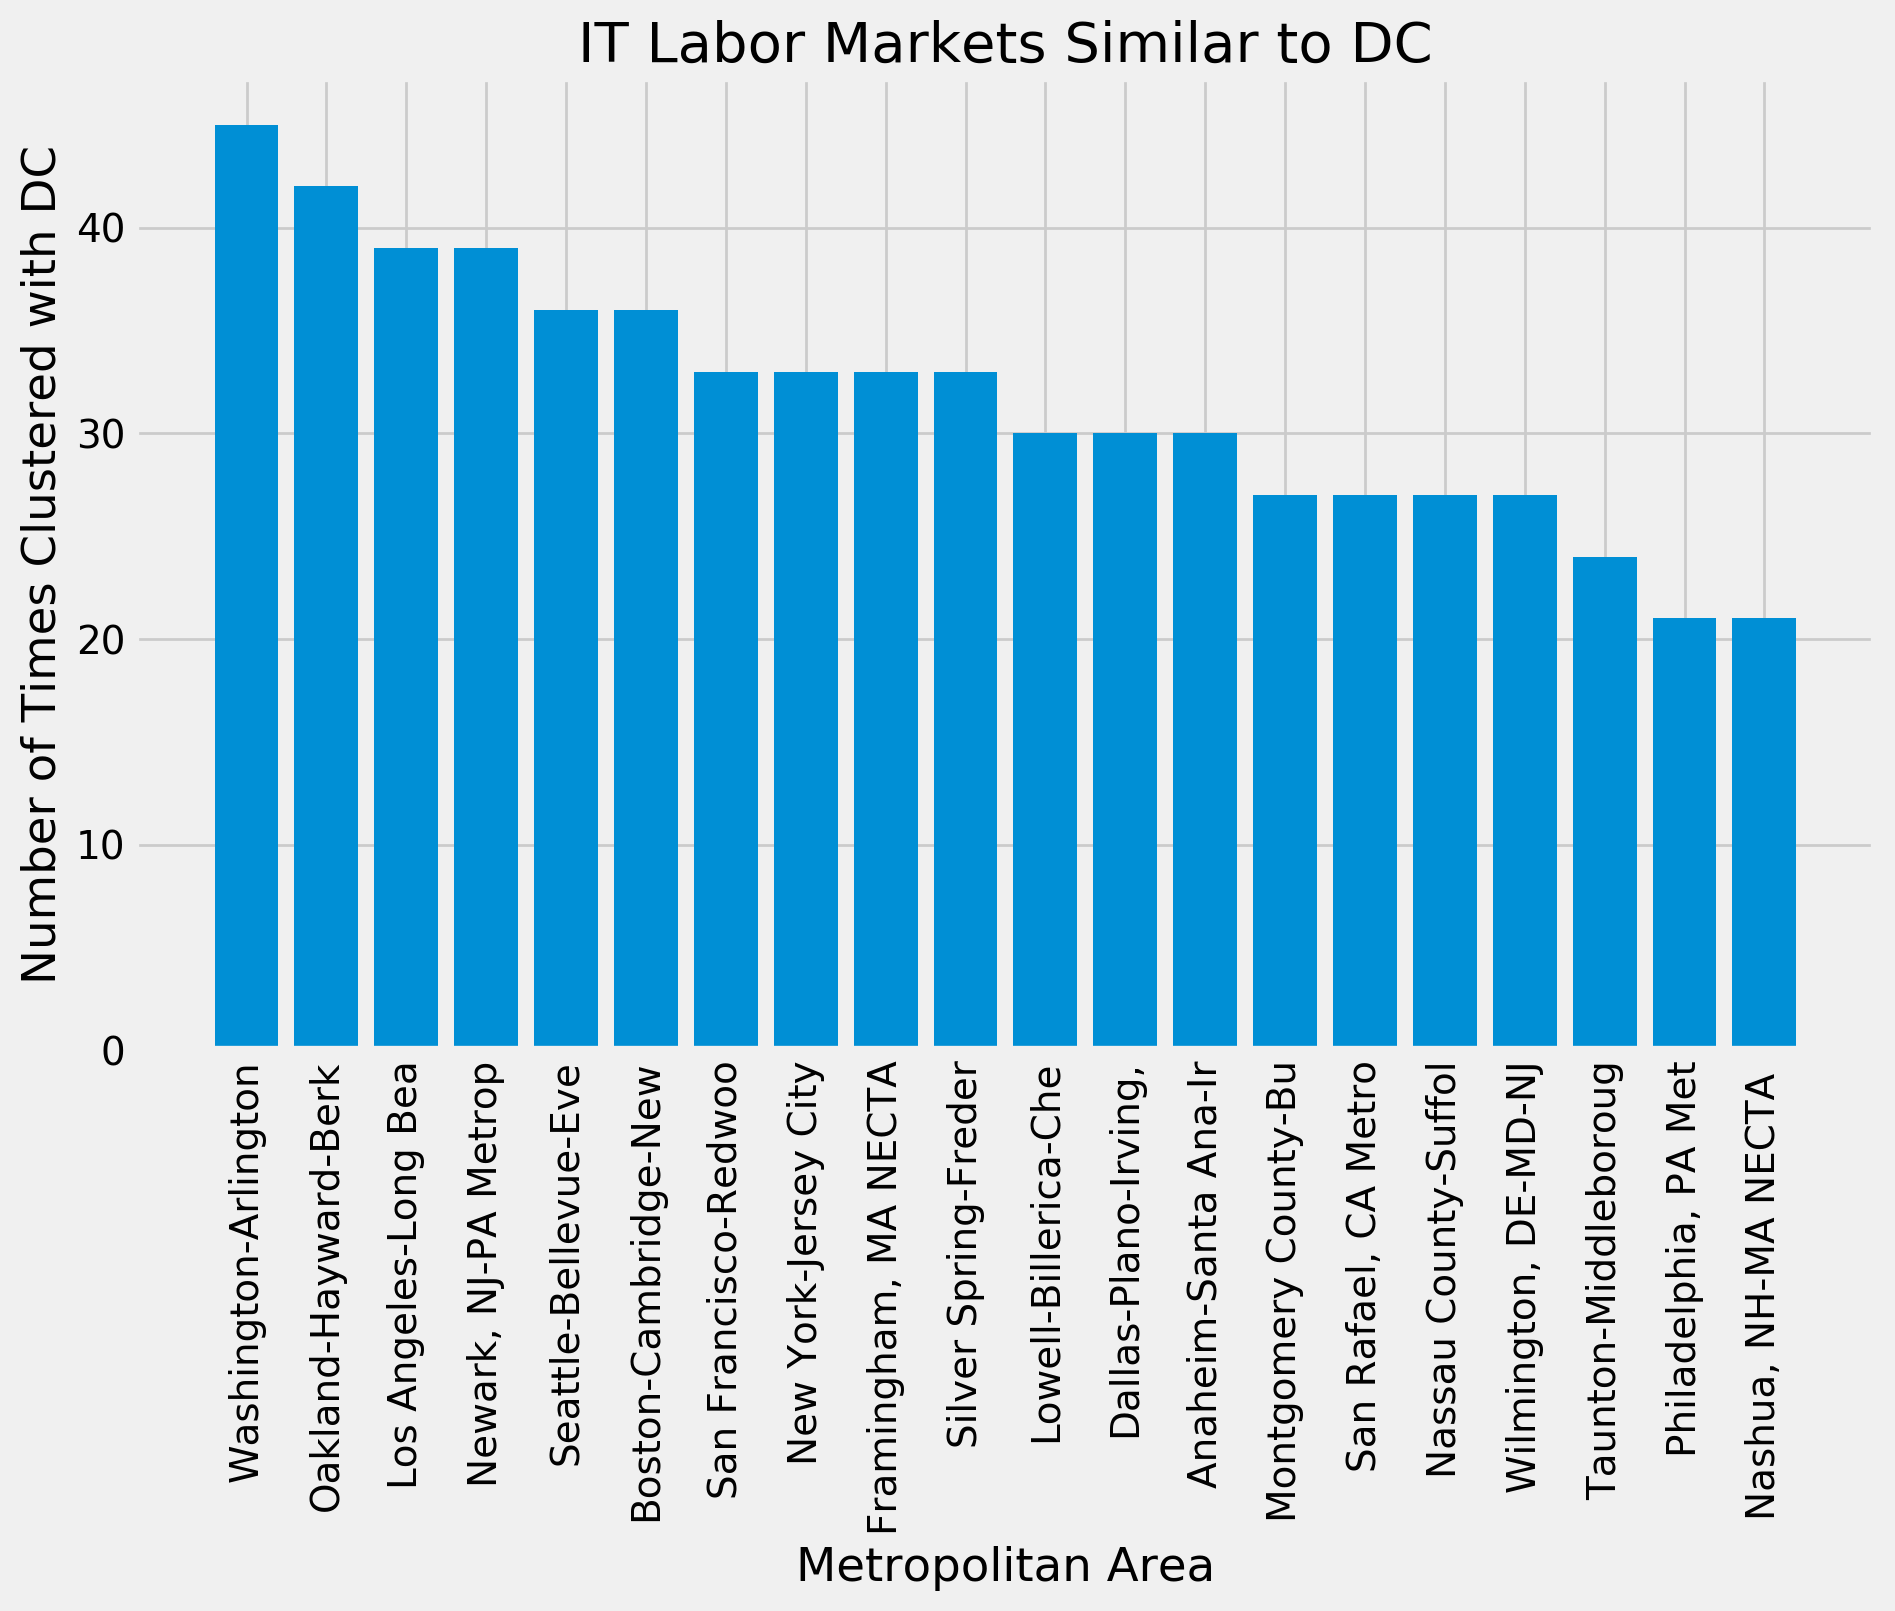

<Figure size 2000x2000 with 0 Axes>

In [39]:
plt.style.use('fivethirtyeight')
plt.bar(x,y)

plt.title('IT Labor Markets Similar to DC')
plt.xlabel('Metropolitan Area')
plt.ylabel('Number of Times Clustered with DC')
plt.xticks(rotation = 'vertical')
plt.figure(figsize = (10,10), dpi=200)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (10,6)
plt.show()